# Data Understanding

The data for this data science project in researching factors influencing teenage alcoholism was sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/student%2Bperformance#). It was donated to the site by Prof. Paulo Cortez of University Minho. His original work on the dataset, "USING DATA MINING TO PREDICT SECONDARY SCHOOL STUDENT PERFORMANCE, can be found [here](http://www3.dsi.uminho.pt/pcortez/student.pdf)

The data set consists of information on various attributes for each student, taking Portuguese language classes who come from ether of the two higher secondary schools, The Gabriel Pereira School and  the Mousinho da Silveira School. There is information on 649 students on 33 attributes. A list of all the features with description can be found on [Readme](https://github.com/Yeshi341/Student_Alcohol_Consumption/blob/master/Readme.md) section of the Github page to this project. The features have also been described sequentially as [EDA]('EDA.ipynb') was performed on each variable in the EDA notebook.

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
df = pd.read_csv('preprocessing_file.csv')

In [4]:
pd.set_option("display.max_columns",None)
df.head()

SyntaxError: invalid syntax (4224013983.py, line 2)

<Axes: >

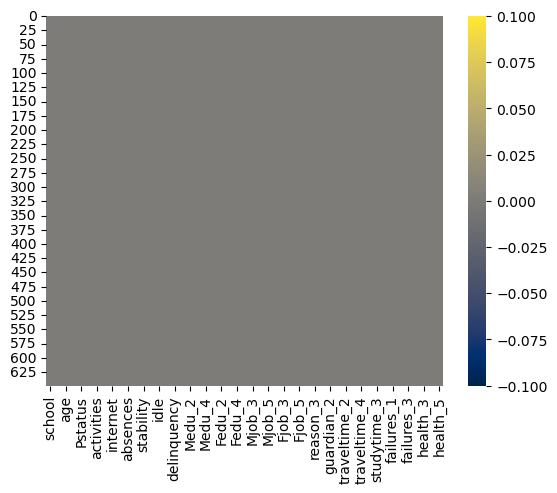

In [5]:
sns.heatmap(df.isnull(),cmap='cividis')

In [4]:
print(df.shape)
print(df.columns)

(649, 51)
Index(['school', 'sex', 'age', 'address', 'Pstatus', 'paid', 'activities',
       'nursery', 'internet', 'romantic', 'absences', 'alc', 'stability',
       'academic_support', 'idle', 'grade_avg', 'delinquency', 'Medu_1',
       'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4',
       'Mjob_2', 'Mjob_3', 'Mjob_4', 'Mjob_5', 'Fjob_2', 'Fjob_3', 'Fjob_4',
       'Fjob_5', 'reason_2', 'reason_3', 'reason_4', 'guardian_2',
       'guardian_3', 'traveltime_2', 'traveltime_3', 'traveltime_4',
       'studytime_2', 'studytime_3', 'studytime_4', 'failures_1', 'failures_2',
       'failures_3', 'health_2', 'health_3', 'health_4', 'health_5'],
      dtype='object')


### Train Test Split

In [23]:
X = df.drop(columns = ['alc'], axis = 1) 
y = df['alc']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=150, test_size=0.2)

print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape,)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape,)
#print(y_train.value_counts(normalize = True))
#print(y_test.value_counts(normalize = True))

Training set - Features:  (519, 50) Target:  (519,)
Test set - Features:  (130, 50) Target:  (130,)


### Handling Class Imbalance - with Oversampling minority class

### Upsampling Minority

In [42]:
training  = pd.concat([X_train, y_train], axis=1)

In [43]:
light_drinker = training[training.alc==0]
heavy_drinker = training[training.alc==1]

print('light drinker count: '+ str(len(light_drinker)))
print('heavy drinker count: '+ str(len(heavy_drinker)))

light drinker count: 426
heavy drinker count: 93


In [44]:
from sklearn.utils import resample

In [45]:
heavy_drinker_upsampled = resample(heavy_drinker,
                          replace=True, 
                          n_samples=len(light_drinker), 
                          random_state=23) 
heavy_drinker_upsampled.shape

(426, 51)

In [46]:
upsampled = pd.concat([light_drinker, heavy_drinker_upsampled])
upsampled.alc.value_counts()

0    426
1    426
Name: alc, dtype: int64

In [49]:
y_train_up = upsampled.alc
X_train_up = upsampled.drop(columns = 'alc', axis=1)
print(X_train_up.shape)


(852, 50)


**Scaling**

In [51]:
scaler= MinMaxScaler()  
scaler.fit(X_train_up)

X_train_scaleu = scaler.transform(X_train_up)  
X_test_scale = scaler.transform(X_test)

# Feature Selection

### Select Kbest 10

In [53]:

selector = SelectKBest(f_classif, k=10) 
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]

X_train_kb10 = X_train_up[selected_columns]
X_test_kb10 = X_test[selected_columns]
print(X_train_kb10.shape, X_test_kb10.shape)


(852, 10) (130, 10)


### Select Kbest 15

In [54]:

selector = SelectKBest(f_classif, k=15) 
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb15 = X_train_up[selected_columns]
X_test_kb15 = X_test[selected_columns]

### Select Kbest 20

In [55]:

selector = SelectKBest(f_classif, k=20) 
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb20 = X_train_up[selected_columns]
X_test_kb20 = X_test[selected_columns]

### Select Kbest 25

In [56]:

selector = SelectKBest(f_classif, k=25)
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb25 = X_train_up[selected_columns]
X_test_kb25 = X_test[selected_columns]

### Select Kbest 30

In [57]:

selector = SelectKBest(f_classif, k=30)
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb30 = X_train_up[selected_columns]
X_test_kb30 = X_test[selected_columns]

### Select Kbest 35

In [58]:

selector = SelectKBest(f_classif, k=35) 
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb35 = X_train_up[selected_columns]
X_test_kb35 = X_test[selected_columns]

# Models

Our target variable in this project, tells whether a student is a heavy alcohol drinker or not. Our main concern here becomes that we do not want to predict that a student is not a heavy drinker when they actually are. Thus, we are interested in minimizing chances of any False Negatives. Correctly, identifying student has a problem allows us to appropriately allocate help or resources to ameliorate conditions for that student/s to minimize any drinking problem. 

Thus, our focus will be on the recall score or sensitivity score that tells us the proportion of actual positives identified correctly, given by (TP/(TP+FN). The higher this score, the better. 

We also looked at the Accuracy score and the F1 scores as extra metrics to compare model performance on.

# 1.Logistic Model
**Running a model without any class imbalance resolution on the original features with no transformations or scaling**

In [59]:
lr1 = LogisticRegression(solver='liblinear', random_state=150)

lr1.fit(X_train, y_train)
p = lr1.predict(X_test)

print('\n\nconfusion matrix\n')
print(confusion_matrix(y_test,p))
print('\n\nclassification Report\n')
print(classification_report(y_test,p))



confusion matrix

[[98  5]
 [20  7]]


classification Report

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       103
           1       0.58      0.26      0.36        27

    accuracy                           0.81       130
   macro avg       0.71      0.61      0.62       130
weighted avg       0.78      0.81      0.78       130



In [60]:
results = {}

results['1.logistic_original_features'] = (round(metrics.accuracy_score(y_test, p),4), 
                            round(metrics.f1_score(y_test, p),4), 
                          round(metrics.recall_score(y_test, p),4))
results

{'1.logistic_original_features': (0.8077, 0.359, 0.2593)}

### 2. Logistic Regression with X_train_up (Upsampled Unscaled Train set)

In [62]:
lr_u = LogisticRegression(solver='liblinear')
lr_u.fit(X_train_up, y_train_up)


p = lr_u.predict(X_test)

print('\n\nconfusion matrix\n')
print(confusion_matrix(y_test,p))
print('\n\nclassification Report\n')
print(classification_report(y_test,p))




confusion matrix

[[87 16]
 [14 13]]


classification Report

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       103
           1       0.45      0.48      0.46        27

    accuracy                           0.77       130
   macro avg       0.65      0.66      0.66       130
weighted avg       0.78      0.77      0.77       130



In [63]:
results['2.lr_upsampled'] = (round(metrics.accuracy_score(y_test, p),4), 
                           round(metrics.f1_score(y_test, p),4),
                          round(metrics.recall_score(y_test, p),4))
results

{'1.logistic_original_features': (0.8077, 0.359, 0.2593),
 '2.lr_upsampled': (0.7692, 0.4643, 0.4815)}

### 3. Logistic Regression with X_train_up (Upsampled and Scaled Train set)

In [64]:
lr_us = LogisticRegression(solver='liblinear')


lr_us.fit(X_train_scaleu, y_train_up)
p = lr_us.predict(X_test_scale)

print('\n\nconfusion matrix\n')
print(confusion_matrix(y_test,p))
print('\n\nclassification Report\n')
print(classification_report(y_test,p))




confusion matrix

[[90 13]
 [15 12]]


classification Report

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       103
           1       0.48      0.44      0.46        27

    accuracy                           0.78       130
   macro avg       0.67      0.66      0.66       130
weighted avg       0.78      0.78      0.78       130



In [65]:
results['3.lr_upscaled'] = (round(metrics.accuracy_score(y_test, p),4), 
                           round(metrics.f1_score(y_test, p),4),
                          round(metrics.recall_score(y_test, p),4))
results


{'1.logistic_original_features': (0.8077, 0.359, 0.2593),
 '2.lr_upsampled': (0.7692, 0.4643, 0.4815),
 '3.lr_upscaled': (0.7846, 0.4615, 0.4444)}

### 4. Logistic Regression with K best 10

In [66]:
kb10_lr = LogisticRegression(solver='liblinear')


kb10_lr.fit(X_train_kb10, y_train_up)
p = kb10_lr.predict(X_test_kb10)

print('\n\nconfusion matrix\n')
print(confusion_matrix(y_test,p))
print('\n\nclassification Report\n')
print(classification_report(y_test,p))




confusion matrix

[[84 19]
 [11 16]]


classification Report

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       103
           1       0.46      0.59      0.52        27

    accuracy                           0.77       130
   macro avg       0.67      0.70      0.68       130
weighted avg       0.80      0.77      0.78       130



In [67]:
results['4.lr_kb10'] =  (round(metrics.accuracy_score(y_test, p),4), 
                           round(metrics.f1_score(y_test, p),4),
                          round(metrics.recall_score(y_test, p),4))
results

{'1.logistic_original_features': (0.8077, 0.359, 0.2593),
 '2.lr_upsampled': (0.7692, 0.4643, 0.4815),
 '3.lr_upscaled': (0.7846, 0.4615, 0.4444),
 '4.lr_kb10': (0.7692, 0.5161, 0.5926)}

### 5. Logistic Regression with K best 15

In [68]:
kb15_lr = LogisticRegression(solver='liblinear')

kb15_lr.fit(X_train_kb15, y_train_up)
p = kb15_lr.predict(X_test_kb15)

print('\n\nconfusion matrix\n')
print(confusion_matrix(y_test,p))
print('\n\nclassification Report\n')
print(classification_report(y_test,p))



confusion matrix

[[85 18]
 [11 16]]


classification Report

              precision    recall  f1-score   support

           0       0.89      0.83      0.85       103
           1       0.47      0.59      0.52        27

    accuracy                           0.78       130
   macro avg       0.68      0.71      0.69       130
weighted avg       0.80      0.78      0.79       130



In [69]:
results['5.lr_kb15'] =  (round(metrics.accuracy_score(y_test, p),4), 
                           round(metrics.f1_score(y_test, p),4),
                          round(metrics.recall_score(y_test, p),4))
results

{'1.logistic_original_features': (0.8077, 0.359, 0.2593),
 '2.lr_upsampled': (0.7692, 0.4643, 0.4815),
 '3.lr_upscaled': (0.7846, 0.4615, 0.4444),
 '4.lr_kb10': (0.7692, 0.5161, 0.5926),
 '5.lr_kb15': (0.7769, 0.5246, 0.5926)}

### 6. Logistic Regression with K best 20

In [70]:
kb20_lr = LogisticRegression(solver='liblinear')

kb20_lr.fit(X_train_kb20, y_train_up)
p = kb20_lr.predict(X_test_kb20)

print('\n\nconfusion matrix\n')
print(confusion_matrix(y_test,p))
print('\n\nclassification Report\n')
print(classification_report(y_test,p))



confusion matrix

[[85 18]
 [11 16]]


classification Report

              precision    recall  f1-score   support

           0       0.89      0.83      0.85       103
           1       0.47      0.59      0.52        27

    accuracy                           0.78       130
   macro avg       0.68      0.71      0.69       130
weighted avg       0.80      0.78      0.79       130



In [71]:
results['6.lr_kb20'] =  (round(metrics.accuracy_score(y_test, p),4), 
                           round(metrics.f1_score(y_test, p),4),
                          round(metrics.recall_score(y_test, p),4))
results

{'1.logistic_original_features': (0.8077, 0.359, 0.2593),
 '2.lr_upsampled': (0.7692, 0.4643, 0.4815),
 '3.lr_upscaled': (0.7846, 0.4615, 0.4444),
 '4.lr_kb10': (0.7692, 0.5161, 0.5926),
 '5.lr_kb15': (0.7769, 0.5246, 0.5926),
 '6.lr_kb20': (0.7769, 0.5246, 0.5926)}

### 7. Logistic Regression with K best 25

In [72]:
kb25_lr = LogisticRegression(solver='liblinear')

kb25_lr.fit(X_train_kb25, y_train_up)
p= kb25_lr.predict(X_test_kb25)

print('\n\nconfusion matrix\n')
print(confusion_matrix(y_test,p))
print('\n\nclassification Report\n')
print(classification_report(y_test,p))



confusion matrix

[[86 17]
 [11 16]]


classification Report

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       103
           1       0.48      0.59      0.53        27

    accuracy                           0.78       130
   macro avg       0.69      0.71      0.70       130
weighted avg       0.80      0.78      0.79       130



In [73]:
results['7.lr_kb25'] =  (round(metrics.accuracy_score(y_test, p),4), 
                           round(metrics.f1_score(y_test, p),4),
                          round(metrics.recall_score(y_test, p),4))
results

{'1.logistic_original_features': (0.8077, 0.359, 0.2593),
 '2.lr_upsampled': (0.7692, 0.4643, 0.4815),
 '3.lr_upscaled': (0.7846, 0.4615, 0.4444),
 '4.lr_kb10': (0.7692, 0.5161, 0.5926),
 '5.lr_kb15': (0.7769, 0.5246, 0.5926),
 '6.lr_kb20': (0.7769, 0.5246, 0.5926),
 '7.lr_kb25': (0.7846, 0.5333, 0.5926)}

### 8. Logistic Regression with K best 30

In [74]:
kb30_lr = LogisticRegression(solver='liblinear')

kb30_lr.fit(X_train_kb30, y_train_up)
p = kb30_lr.predict(X_test_kb30)

print('\n\nconfusion matrix\n')
print(confusion_matrix(y_test,p))
print('\n\nclassification Report\n')
print(classification_report(y_test,p))



confusion matrix

[[87 16]
 [13 14]]


classification Report

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       103
           1       0.47      0.52      0.49        27

    accuracy                           0.78       130
   macro avg       0.67      0.68      0.67       130
weighted avg       0.79      0.78      0.78       130



In [75]:
results['8.lr_kb30'] =  (round(metrics.accuracy_score(y_test, p),4), 
                           round(metrics.f1_score(y_test, p),4),
                          round(metrics.recall_score(y_test, p),4))
results

{'1.logistic_original_features': (0.8077, 0.359, 0.2593),
 '2.lr_upsampled': (0.7692, 0.4643, 0.4815),
 '3.lr_upscaled': (0.7846, 0.4615, 0.4444),
 '4.lr_kb10': (0.7692, 0.5161, 0.5926),
 '5.lr_kb15': (0.7769, 0.5246, 0.5926),
 '6.lr_kb20': (0.7769, 0.5246, 0.5926),
 '7.lr_kb25': (0.7846, 0.5333, 0.5926),
 '8.lr_kb30': (0.7769, 0.4912, 0.5185)}

### 9. Logistic Regression with K best 35

In [76]:
kb35_lr = LogisticRegression(solver='liblinear')

kb35_lr.fit(X_train_kb35, y_train_up)
p = kb35_lr.predict(X_test_kb35)

print('\n\nconfusion matrix\n')
print(confusion_matrix(y_test,p))
print('\n\nclassification Report\n')
print(classification_report(y_test,p))



confusion matrix

[[86 17]
 [13 14]]


classification Report

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       103
           1       0.45      0.52      0.48        27

    accuracy                           0.77       130
   macro avg       0.66      0.68      0.67       130
weighted avg       0.78      0.77      0.77       130



In [77]:
results['9.lr_kb35'] =  (round(metrics.accuracy_score(y_test, p),4), 
                           round(metrics.f1_score(y_test, p),4),
                          round(metrics.recall_score(y_test, p),4))
results

{'1.logistic_original_features': (0.8077, 0.359, 0.2593),
 '2.lr_upsampled': (0.7692, 0.4643, 0.4815),
 '3.lr_upscaled': (0.7846, 0.4615, 0.4444),
 '4.lr_kb10': (0.7692, 0.5161, 0.5926),
 '5.lr_kb15': (0.7769, 0.5246, 0.5926),
 '6.lr_kb20': (0.7769, 0.5246, 0.5926),
 '7.lr_kb25': (0.7846, 0.5333, 0.5926),
 '8.lr_kb30': (0.7769, 0.4912, 0.5185),
 '9.lr_kb35': (0.7692, 0.4828, 0.5185)}

**Final model**
we see that higher accuracy come from knn_kb10 so we featured 10 variables for KNN model.



confusion matrix

[[84 19]
 [11 16]]


classification Report

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       103
           1       0.46      0.59      0.52        27

    accuracy                           0.77       130
   macro avg       0.67      0.70      0.68       130
weighted avg       0.80      0.77      0.78       130



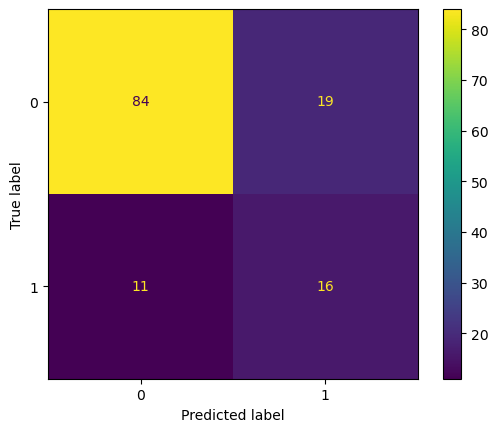

In [78]:

kb10_lr.fit(X_train_kb10, y_train_up)
p = kb10_lr.predict(X_test_kb10)

print('\n\nconfusion matrix\n')
print(confusion_matrix(y_test,p))
print('\n\nclassification Report\n')
print(classification_report(y_test,p))

cm = confusion_matrix(y_test, p)
cm_display = ConfusionMatrixDisplay(cm).plot()